In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


data = pd.read_csv("Student_Marks.csv")
data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [2]:
data["Marks"].min()

5.609

In [3]:
data["time_study"].max()

7.957

In [4]:
data["time_study"].min()

0.096

<Axes: xlabel='time_study', ylabel='Marks'>

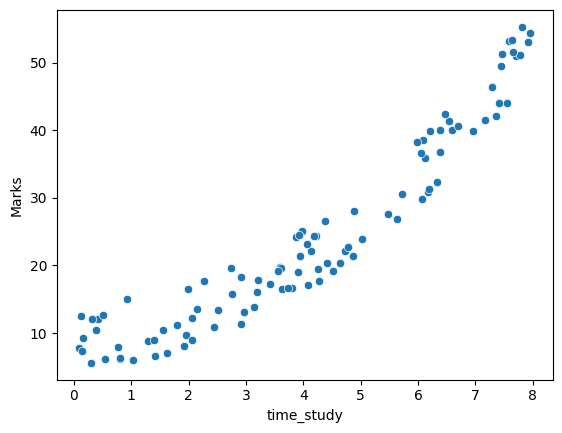

In [5]:
sns.scatterplot(data=data, x="time_study", y="Marks")

In [6]:
data.corr()

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


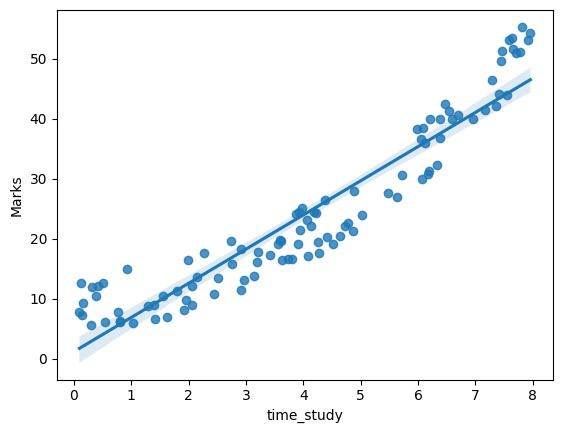

In [7]:
g = sns.regplot(data, x="time_study", y="Marks")

In [8]:
formula = "Marks ~ time_study"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Marks   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     775.8
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           2.36e-48
Time:                        19:20:05   Log-Likelihood:                -298.21
No. Observations:                 100   AIC:                             600.4
Df Residuals:                      98   BIC:                             605.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2239      0.962      1.272      0.206      -0.686       3.133
time_study     5.6888      0.204     27.853      0.000       5.283       6.094
==============================================================================
Omnibus:                        7.504   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                4.633
Skew:                           0.357   Prob(JB):                       0.0986
Kurtosis:                       2.225   Cond. No.                         9.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
data_to_predict = pd.read_csv("Study_Marks_to_estimate.csv")
data_to_predict["MarksPredicted"] = res.predict(data_to_predict)
data_to_predict.head()

,number_courses,time_study,MarksPredicted
0,3,5.5,32.511985
1,4,8.0,46.733861
2,1,3.0,18.290109


In [10]:
data = pd.read_csv("house_prices.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2-STORY 1946+,RL,65.0,8450,Pave,NaN,0,Lvl,3,...,0,0,0,NaN,0,Feb,2008,WD,Normal,208500
1,2,1-STORY 1946+,RL,80.0,9600,Pave,NaN,0,Lvl,3,...,0,0,0,NaN,0,May,2007,WD,Normal,181500
2,3,2-STORY 1946+,RL,68.0,11250,Pave,NaN,1,Lvl,3,...,0,0,0,NaN,0,Sept,2008,WD,Normal,223500
3,4,2-STORY 1945-,RL,60.0,9550,Pave,NaN,1,Lvl,3,...,0,0,0,NaN,0,Feb,2006,WD,Abnorml,140000
4,5,2-STORY 1946+,RL,84.0,14260,Pave,NaN,1,Lvl,3,...,0,0,0,NaN,0,Dec,2008,WD,Normal,250000


<Axes: xlabel='SalePrice'>

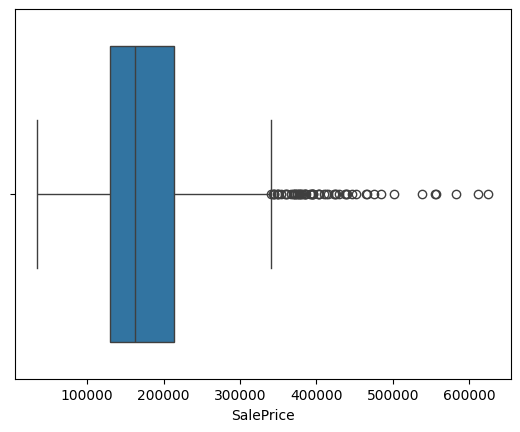

In [11]:
sns.boxplot(data, x="SalePrice")

In [12]:
data = pd.read_csv("Concrete_Data_Yeh.csv")
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [13]:
from statsmodels.stats.outliers_influence import OLSInfluence

formula = "csMPa ~ cement + slag + flyash + water + superplasticizer + coarseaggregate + fineaggregate + age"
mod = smf.ols(formula=formula, data=data)
results = mod.fit()
influence = OLSInfluence(results)
data['Cook Distance'] = influence.cooks_distance[0]
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,Cook Distance
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.010162
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.000904
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.004950
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.022152
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0.009223


In [14]:
data.corr()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,Cook Distance
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832,0.171959
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829,0.048658
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755,-0.104895
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633,0.010032
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079,-0.004707
coarseaggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935,-0.047566
fineaggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241,-0.126911
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873,0.434338
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000,0.095162
Cook Distance,0.171959,0.048658,-0.104895,0.010032,-0.004707,-0.047566,-0.126911,0.434338,0.095162,1.000000


In [15]:
formula = "csMPa ~ cement + slag + flyash + water + superplasticizer + coarseaggregate + fineaggregate + age"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  csMPa   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.3
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          6.29e-206
Time:                        19:20:05   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -23.3312     26.586     -0.878      0.380     -75.500      28.837
cement               0.1198      0.008     14.113      0.000       0.103       0.136
slag                 0.1039      0.010     10.247      0.000       0.084       0.124
flyash               0.0879      0.013      6.988      0.000       0.063       0.113
water               -0.1499      0.040     -3.731      0.000      -0.229      -0.071
superplasticizer     0.2922      0.093      3.128      0.002       0.109       0.476
coarseaggregate      0.0181      0.009      1.926      0.054      -0.000       0.037
fineaggregate        0.0202      0.011      1.887      0.059      -0.001       0.041
age                  0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Kvalita modelu OLS (Ordinary Least Squares) pro predikci pevnosti betonu v MPa lze hodnotit na základě několika klíčových statistik, které byly poskytnuty ve výstupu modelu.

# R-squared (R²) = 0.616 a Adjusted R-squared = 0.613: Tyto hodnoty ukazují, že model vysvětluje zhruba 61.6% variability pevnosti betonu, což je slušný výsledek pro real-world data v oblasti stavebnictví. Přestože model je užitečný, existují pravděpodobně i další faktory nezahrnuté v modelu, které mohou pevnost betonu ovlivňovat.
# F-statistika: Hodnota 204.3 s extrémně nízkou p-hodnotou (6.29e-206) ukazuje, že model je jako celek statisticky významný. To znamená, že alespoň některé z vysvětlujících proměnných mají signifikantní vliv na pevnost betonu.
# Koeficienty: Většina koeficientů má pozitivní hodnoty, což ukazuje, že zvyšují pevnost betonu. Výjimkou je voda, jejíž koeficient je záporný.
# Durbin-Watson: Hodnota 1.282 naznačuje možnou mírnou pozitivní autokorelaci mezi rezidui, což může být znepokojivé a může naznačovat, že model by mohl být vylepšen, například přidáním dalších proměnných nebo upravením stávajících prediktorů.
# P-hodnoty koeficientů: Zatímco většina koeficientů je statisticky významná, koeficienty pro coarseaggregate a fineaggregate jsou hraniční (p-hodnoty 0.054 a 0.059). Toto může naznačovat, že jejich přesný vliv na pevnost betonu není tak jednoznačný.


# Složka betonu, která ovlivňuje sílu betonu negativně:
# Voda (water): Koeficient pro vodu je -0.1499, což znamená, že s každým přidaným litrem vody na kubický metr betonu se pevnost betonu snižuje o 0.1499 MPa.
# Tento negativní vliv vody je logický, neboť nadměrné množství vody může snížit pevnost betonu tím, že zvyšuje pórovitost a snižuje celkovou hustotu betonové směsi.
# Závěrem, model má dobrou prediktivní schopnost a je statisticky významný, ale je možné, že by mohl být dále vylepšen pro dosažení lepších predikcí, zejména co se týče modelování vlivu vody a kameniva na pevnost betonu.

# Koeficienty:
# Intercept (konstanta): -23.3312, p-hodnota je 0.380, což naznačuje, že konstanta není statisticky významná.
# - cement: Za každý kilogram cementu na kubický metr betonu se pevnost zvyšuje o 0.1198 MPa, p < 0.001.
# - slag (struska): Za každý kilogram strusky na kubický metr betonu se pevnost zvyšuje o 0.1039 MPa, p < 0.001.
# - flyash (letový popílek): Za každý kilogram letového popílku na kubický metr betonu se pevnost zvyšuje o 0.0879 MPa, p < 0.001.
# - water (voda): Za každý litr vody na kubický metr betonu se pevnost snižuje o 0.1499 MPa, p < 0.001.
# - superplasticizer: Za každý kilogram superplastifikátoru na kubický metr betonu se pevnost zvyšuje o 0.2922 MPa, p = 0.002.
# - coarseaggregate (hrubý kámen): Za každý kilogram hrubého kameniva na kubický metr betonu se pevnost zvyšuje o 0.0181 MPa, p = 0.054 (hraničně statisticky významný).
# - fineaggregate (jemné kamenivo): Za každý kilogram jemného kameniva na kubický metr betonu se pevnost zvyšuje o 0.0202 MPa, p = 0.059 (hraničně statisticky významný).
# - age (stáří): Za každý den stárnutí betonu se pevnost zvyšuje o 0.1142 MPa, p < 0.001.

# Model je statisticky významný a některé proměnné mají silný vliv na pevnost betonu, jako je stáří betonu, cement, struska a letový popílek.
# Voda a superplastifikátory mají také značný vliv, ale opačným směrem (voda snižuje pevnost).

In [16]:
data = pd.read_csv("expenses.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
formula = "charges ~ age + bmi"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     88.60
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           7.39e-37
Time:                        19:20:05   Log-Likelihood:                -14394.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1335   BIC:                         2.881e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6424.8046   1744.091     -3.684      0.000   -9846.262   -3003.347
age          241.9308     22.298     10.850      0.000     198.187     285.674
bmi          332.9651     51.374      6.481      0.000     232.182     433.748
==============================================================================
Omnibus:                      321.874   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.574
Skew:                           1.511   Prob(JB):                    2.11e-129
Kurtosis:                       4.223   Cond. No.                         287.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Výsledky regresní analýzy pomocí metody nejmenších čtverců (OLS) pro závislou proměnnou "charges" (platby za pojištění) ukazují, jak věk a BMI (body mass index) ovlivňují výši plateb za pojištěnce.
# Model využívá pouze tyto dvě nezávislé proměnné a jeho charakteristiky jsou následující:

# R-squared (R²) = 0.117: Tato hodnota indikuje, že model dokáže vysvětlit pouze 11.7% variability v platbách za pojištěnce na základě věku a BMI. Toto je relativně nízké číslo, což naznačuje, že model nepokrývá mnoho faktorů ovlivňujících platby za pojištění.
# Adjusted R-squared (Adj. R²) = 0.116: Upravený koeficient determinace je velmi blízký R², což ukazuje, že model není zatížen nadbytečným počtem proměnných. I tak jeho prediktivní schopnost zůstává nízká.
# F-statistika = 88.60 s p-hodnota = 7.39e-37: Tato statistika a velmi nízká p-hodnota ukazují, že model jako celek je statisticky významný. To znamená, že alespoň jeden z koeficientů (věk nebo BMI) má statisticky významný vliv na platby za pojištěnce.

# Koeficienty:
# Intercept (konstanta): -6424.8046 s p-hodnotou < 0.001. Intercept je statisticky významný, ale jeho negativní hodnota není prakticky interpretabilní bez dalších kontextových informací.
# Věk (age): Koeficient 241.9308 znamená, že s každým rokem se očekávané platby za pojištěnce zvyšují o přibližně 241.93 dolarů, p-hodnota < 0.001.
# BMI (bmi): Koeficient 332.9651 naznačuje, že s každým bodem BMI se platby za pojištěnce zvyšují o 332.97 dolarů, p-hodnota < 0.001.

# Diagnostika reziduí:
# Omnibus test: Výsledek testu je statisticky významný (p < 0.001), což naznačuje, že rezidua nejsou normálně distribuovaná.
# Durbin-Watson: Hodnota 2.010 naznačuje, že mezi rezidui není žádná autokorelace.
# Skew (šikmost) a Kurtosis (špičatost): Hodnoty ukazují, že distribuce reziduí má vyšší špičatost a je více šikmá než normální distribuce.

# Zhodnocení modelu
# I přesto, že F-statistika ukazuje, že model je celkově statisticky významný, jeho nízké R-squared hodnoty naznačují, že model je relativně slabý v predikci plateb za pojištěnce. To může být způsobeno vyloučením jiných významných proměnných, jako jsou kuřák/nekuřák, pohlaví, počet dětí nebo region, které mohou mít zásadní vliv na platby za pojištění. Zlepšení modelu by mohlo zahrnovat zahrnutí těchto dalších proměnných a testování interakcí mezi nimi, aby bylo dosaženo vyšší prediktivní schopnosti.

In [18]:
def smoker(row):
    if row["smoker"] == "yes":
        return 1
    else:
        return 0


def sex(row):
    if row["sex"] == "male":
        return 1
    else:
        return 0


data["smoker_number"] = data.apply(smoker, axis=1)
data["sex"] = data.apply(sex, axis=1)

formula = "charges ~  age + bmi + smoker_number"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:20:06   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.168e+04    937.569    -12.454      0.000   -1.35e+04   -9837.561
age             259.5475     11.934     21.748      0.000     236.136     282.959
bmi             322.6151     27.487     11.737      0.000     268.692     376.538
smoker_number  2.382e+04    412.867     57.703      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      299.709   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.137
Skew:                           1.213   Prob(JB):                    6.25e-155
Kurtosis:                       5.618   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Takový postup vytváření je poměrně pracný, hlavně v případě, že proměnná nabývá více různých hodnot. pandas k tomu nabízí funkci get_dummies(). Vyzkoušej si funkci použitím příkazu níže.

smoker = pandas.get_dummies(data["smoker"])
smoker

In [19]:
smoker = pd.get_dummies(data["smoker"])
smoker

,no,yes
0,False,True
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
1333,True,False
1334,True,False
1335,True,False
1336,True,False


Dále připoj data do původní tabulky. Připojení je nutné provést s využitím indexů, protože tabulky nemají společný sloupec. Proto využij funkci merge() s parametry left_index=True a right_index=True.

data = pandas.merge(data, smoker, left_index=True, right_index=True)
data

In [20]:
data = pd.merge(data, smoker, left_index=True, right_index=True)
data.head()

,age,sex,bmi,children,smoker,region,charges,smoker_number,no,yes
0,19,0,27.900,0,yes,southwest,16884.92400,1,False,True
1,18,1,33.770,1,no,southeast,1725.55230,0,True,False
2,28,1,33.000,3,no,southeast,4449.46200,0,True,False
3,33,1,22.705,0,no,northwest,21984.47061,0,True,False
4,32,1,28.880,0,no,northwest,3866.85520,0,True,False


Nyní využij tento sloupec ve svém regresním modelu. Stačí využít jeden sloupec, například yes. Oba sloupce totiž poskytují stejnou informaci, pouze jako obrácenou hodnotu.

In [21]:
formula = "charges ~  age + bmi + yes"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:20:06   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.168e+04    937.569    -12.454      0.000   -1.35e+04   -9837.561
yes[T.True]  2.382e+04    412.867     57.703      0.000     2.3e+04    2.46e+04
age           259.5475     11.934     21.748      0.000     236.136     282.959
bmi           322.6151     27.487     11.737      0.000     268.692     376.538
==============================================================================
Omnibus:                      299.709   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.137
Skew:                           1.213   Prob(JB):                    6.25e-155
Kurtosis:                       5.618   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# V tomto modelu OLS (Ordinary Least Squares) bylo k prediktorům věk a BMI přidáno binární kódování (One Hot Encoding) pro proměnnou "kuřák" (yes). Výsledky regrese ukazují výrazné zlepšení v predikční schopnosti modelu v porovnání s předchozím modelem, který zahrnoval pouze věk a BMI.

# Výsledky modelu
# R-squared (R²) = 0.747 a Adjusted R-squared = 0.747: Tento model vysvětluje 74.7% variability v platbách za pojištěnce, což je výrazné zlepšení oproti předchozímu modelu. Tato hodnota naznačuje, že model je velmi efektivní v popisu vztahů mezi závislou proměnnou a vysvětlujícími proměnnými.
# F-statistika = 1316 s p-hodnota = 0.00: Extrémně nízká p-hodnota ukazuje, že model jako celek je statisticky významný a poskytuje silnou evidenci, že alespoň jeden z prediktorů má významný vliv na výši plateb za pojištění.

# Koeficienty:
# Intercept (konstanta): -11680, indikuje základní platby za pojištěnce pro nekuřáky s danými hodnotami BMI a věku rovnými nule.
# - yes[T.True] (kuřák): Koeficient 23820 znamená, že kuřáci platí průměrně o 23820 dolarů více než nekuřáci, což je velmi výrazný rozdíl, p-hodnota < 0.001.
# - Věk (age): Každý rok navíc zvyšuje platby za pojištění o přibližně 259.55 dolarů.
# - BMI (bmi): Každý bod BMI zvyšuje platby o 322.62 dolarů.

# Diagnostika reziduí:
# Omnibus test a Jarque-Bera (JB) test: Oba testy jsou statisticky významné a naznačují, že rezidua nejsou normálně distribuovaná.
# Durbin-Watson: Hodnota 2.077 naznačuje, že autokorelace mezi rezidui je minimální.

# Zhodnocení modelu
# Přidání proměnné "kuřák" významně zlepšilo prediktivní schopnosti modelu, což ukazuje, že fakt, zda je osoba kuřákem, má významný dopad na výši plateb za zdravotní pojištění.
# Vysoké R-squared hodnoty a výrazné koeficienty naznačují, že model je velmi účinný v odhadu plateb.
# Avšak nízká normalita reziduí by mohla být znepokojivá pro některé typy dalších analýz a může znamenat, že modelování rozdělení plateb může vyžadovat pokročilejší metody, jako je transformace proměnných nebo použití jiných typů regresních modelů.